# **Music Mood Prediction using Machine Learning**
Music mood prediction is a process of determining the mood of a piece of music by analyzing various features of the music such as acousticness, energy, valence etc. The goal of music mood prediction is to accurately classify a piece of music into one or more mood categories, such as happy, sad, energetic, or calm.

### ***Imports***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### ***Loading Dataset***

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!mkdir /content/MusicMoodDataset
!cp /content/gdrive/MyDrive/MusicMoodDataset/* /content/MusicMoodDataset/

In [ ]:
dataset_path = "/content/MusicMoodDataset/SpotifyAudioFeaturesApril2019.csv"
supervised_dataset_path = "/content/MusicMoodDataset/data_moods.csv"

In [ ]:
dataset = pd.read_csv(dataset_path)
supervised_dataset = pd.read_csv(supervised_dataset_path)

In [ ]:
dataset.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [ ]:
print(f"Columns = {dataset.columns}")
print(f"Shape = {dataset.shape}")

Columns = Index(['artist_name', 'track_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'popularity'],
      dtype='object')
Shape = (130663, 17)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130663 entries, 0 to 130662
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist_name       130663 non-null  object 
 1   track_id          130663 non-null  object 
 2   track_name        130663 non-null  object 
 3   acousticness      130663 non-null  float64
 4   danceability      130663 non-null  float64
 5   duration_ms       130663 non-null  int64  
 6   energy            130663 non-null  float64
 7   instrumentalness  130663 non-null  float64
 8   key               130663 non-null  int64  
 9   liveness          130663 non-null  float64
 10  loudness          130663 non-null  float64
 11  mode              130663 non-null  int64  
 12  speechiness       130663 non-null  float64
 13  tempo             130663 non-null  float64
 14  time_signature    130663 non-null  int64  
 15  valence           130663 non-null  float64
 16  popularity        13

### ***Dropping Irrelevant Columns***

In [ ]:
supervised_dataset.columns

Index(['name', 'album', 'artist', 'id', 'release_date', 'popularity', 'length',
       'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key',
       'time_signature', 'mood'],
      dtype='object')

In [ ]:
drop_cols = ["artist_name","track_id","track_name","duration_ms","popularity","mode"]
sup_drop_cols = ["name","artist","id","release_date","popularity","length","album"]
dataset=dataset.drop(columns = drop_cols)
supervised_dataset=supervised_dataset.drop(columns = sup_drop_cols)

In [ ]:
dataset.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,0.005820,0.743,0.339,0.000,1,0.0812,-7.678,0.4090,203.927,4,0.118
1,0.024400,0.846,0.557,0.000,8,0.2860,-7.259,0.4570,159.009,4,0.371
2,0.025000,0.603,0.723,0.000,9,0.0824,-5.890,0.0454,114.966,4,0.382
3,0.029400,0.800,0.579,0.912,5,0.0994,-12.118,0.0701,123.003,4,0.641
4,0.000035,0.783,0.792,0.878,7,0.0332,-10.277,0.0661,120.047,4,0.928


### ***Sorting the dataset***

In [ ]:
dataset = dataset[sorted(dataset.columns)]
supervised_dataset = supervised_dataset[sorted(supervised_dataset.columns)]

In [ ]:
supervised_dataset.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mood,speechiness,tempo,time_signature,valence
0,0.13700,0.866,0.730,0.000000,5,0.0843,-8.201,Happy,0.0767,118.523,4,0.625
1,0.01890,0.381,0.832,0.196000,8,0.1530,-5.069,Sad,0.0492,120.255,4,0.166
2,0.91300,0.346,0.139,0.000077,0,0.0934,-15.326,Sad,0.0321,136.168,4,0.116
3,0.08900,0.466,0.438,0.000006,4,0.1130,-12.858,Happy,0.0608,193.100,4,0.587
4,0.00171,0.419,0.932,0.000000,1,0.1370,-3.604,Energetic,0.1060,169.881,4,0.445


In [ ]:
print(supervised_dataset.shape)
print(dataset.shape)

(686, 12)
(130663, 11)


### ***Analysing the Data Distribution***

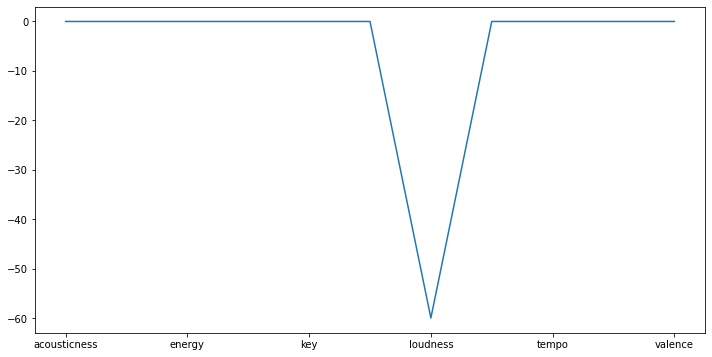

In [ ]:
dataset.describe().T["min"].plot(figsize=(12,6))
# sns.kdeplot(dataset.describe().T["min"])

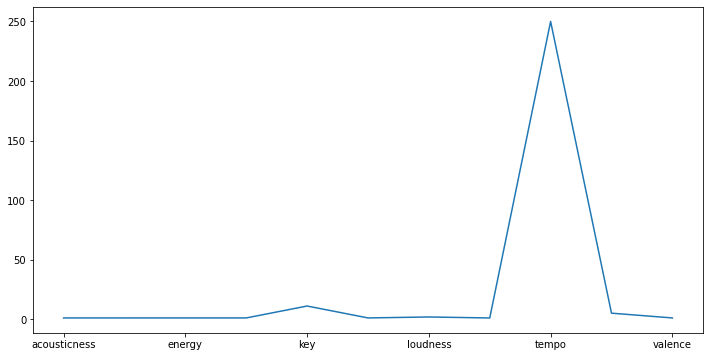

In [ ]:
dataset.describe().T["max"].plot(figsize=(12,6))
# sns.distplot(dataset.describe().T["min"])

## **Normalizing the data**

### **MinMaxScaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data_cols = dataset.columns
x = dataset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataset = pd.DataFrame(x_scaled,columns = data_cols)

In [ ]:
norm = supervised_dataset.drop(columns = ["mood"])
data_cols = norm.columns
x = norm.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
norm = pd.DataFrame(x_scaled,columns = data_cols)

norm["mood"] = supervised_dataset["mood"].copy()
supervised_dataset = norm.copy()
del norm

In [ ]:
dataset.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,0.005843,0.745984,0.339,0.000,0.090909,0.081281,0.846552,0.423395,0.815763,0.8,0.118
1,0.024498,0.849398,0.557,0.000,0.727273,0.286286,0.853331,0.473085,0.636079,0.8,0.371
2,0.025100,0.605422,0.723,0.000,0.818182,0.082482,0.875481,0.046998,0.459895,0.8,0.382
3,0.029518,0.803213,0.579,0.912,0.454545,0.099499,0.774714,0.072567,0.492045,0.8,0.641
4,0.000035,0.786145,0.792,0.878,0.636364,0.033233,0.804501,0.068427,0.480221,0.8,0.928


In [ ]:
supervised_dataset.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,mood
0,0.137546,0.913003,0.734061,0.000000,0.454545,0.056379,0.779912,0.136202,0.404593,0.75,0.626208,Happy
1,0.018971,0.350423,0.836810,0.202899,0.727273,0.130155,0.852145,0.066191,0.414965,0.75,0.138792,Sad
2,0.916666,0.309825,0.138721,0.000080,0.000000,0.066151,0.615590,0.022658,0.510258,0.75,0.085696,Sad
3,0.089353,0.449020,0.439917,0.000006,0.363636,0.087199,0.672509,0.095723,0.851189,0.75,0.585855,Happy
4,0.001711,0.394502,0.937545,0.000000,0.090909,0.112973,0.885932,0.210794,0.712144,0.75,0.435064,Energetic


In [ ]:
dataset.describe()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
count,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000
mean,0.343876,0.583804,0.569196,0.224018,0.475627,0.195081,0.809404,0.115958,0.477926,0.775797,0.439630
std,0.347029,0.190840,0.260312,0.360328,0.327518,0.167901,0.105886,0.128703,0.120647,0.102881,0.259079
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031727,0.460843,0.396000,0.000000,0.181818,0.097598,0.778274,0.040269,0.384082,0.800000,0.224000
50%,0.203815,0.607430,0.603000,0.000149,0.454545,0.124124,0.841682,0.057867,0.480141,0.800000,0.420000
75%,0.638554,0.729920,0.775000,0.440000,0.727273,0.236236,0.878814,0.133540,0.558606,0.800000,0.638000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **Normalized Data Distribution**

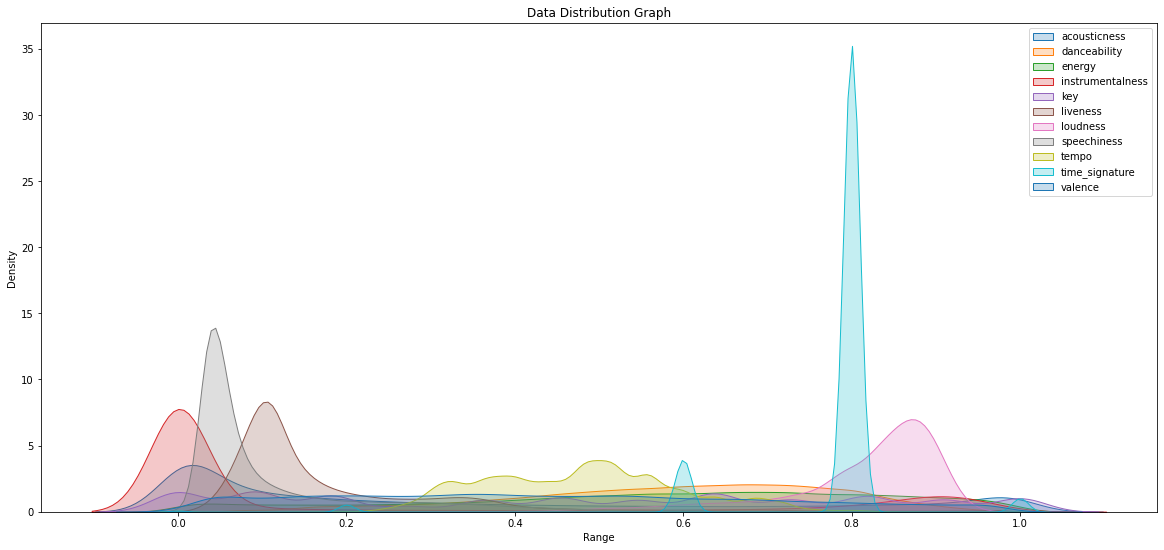

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,9))
plt.title("Data Distribution Graph")
plt.xlabel("Range")
#plt1.ylabel("")
columns=dataset.columns
for cols in columns:
  sns.kdeplot(data=dataset,x=cols, shade=True,label=cols)
plt.legend()

## ***Training Supervised Models***

### ***KNN***

In [ ]:
from sklearn.model_selection import train_test_split

X = supervised_dataset.drop(columns = ["mood"]).values
Y = supervised_dataset["mood"].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 1)

In [ ]:
print(f"Training Size: {X_train.shape}\nTesting Size: {X_test.shape}")

Training Size: (548, 11)
Testing Size: (138, 11)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))

[[35  0  0  1]
 [ 0 28  8  1]
 [ 0  7 16  0]
 [ 4  0  6 32]]
              precision    recall  f1-score   support

        Calm       0.90      0.97      0.93        36
   Energetic       0.80      0.76      0.78        37
       Happy       0.53      0.70      0.60        23
         Sad       0.94      0.76      0.84        42

    accuracy                           0.80       138
   macro avg       0.79      0.80      0.79       138
weighted avg       0.82      0.80      0.81       138

0.8043478260869565


### ***Decision Tree***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(random_state=10).fit(X_train,Y_train)
Y_pred_tree = decisionTree.predict(X_test)

              precision    recall  f1-score   support

        Calm       0.97      0.97      0.97        36
   Energetic       0.72      0.70      0.71        37
       Happy       0.42      0.43      0.43        23
         Sad       0.88      0.88      0.88        42

    accuracy                           0.78       138
   macro avg       0.75      0.75      0.75       138
weighted avg       0.78      0.78      0.78       138

0.782608695652174


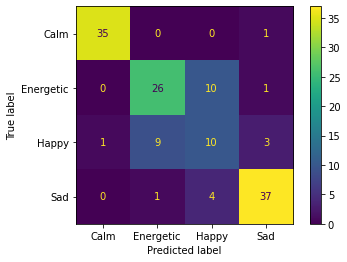

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred_tree))
print(classification_report(Y_test,Y_pred_tree))
print(accuracy_score(Y_test,Y_pred_tree))

### ***Random Forest Classifier***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=50,criterion='entropy')
clf.fit(X_train,Y_train)
predictions=clf.predict(X_train)
                           

0.8043478260869565
              precision    recall  f1-score   support

        Calm       0.90      0.97      0.93        36
   Energetic       0.80      0.76      0.78        37
       Happy       0.53      0.70      0.60        23
         Sad       0.94      0.76      0.84        42

    accuracy                           0.80       138
   macro avg       0.79      0.80      0.79       138
weighted avg       0.82      0.80      0.81       138



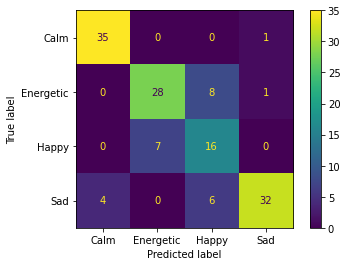

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

### **XGBoost**

In [ ]:
from xgboost import XGBClassifier
clf=XGBClassifier()
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

0.8623188405797102
              precision    recall  f1-score   support

        Calm       0.97      0.97      0.97        36
   Energetic       0.82      0.76      0.79        37
       Happy       0.64      0.70      0.67        23
         Sad       0.93      0.95      0.94        42

    accuracy                           0.86       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.86      0.86      0.86       138



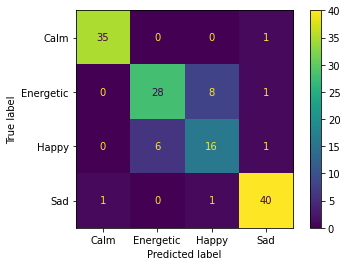

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

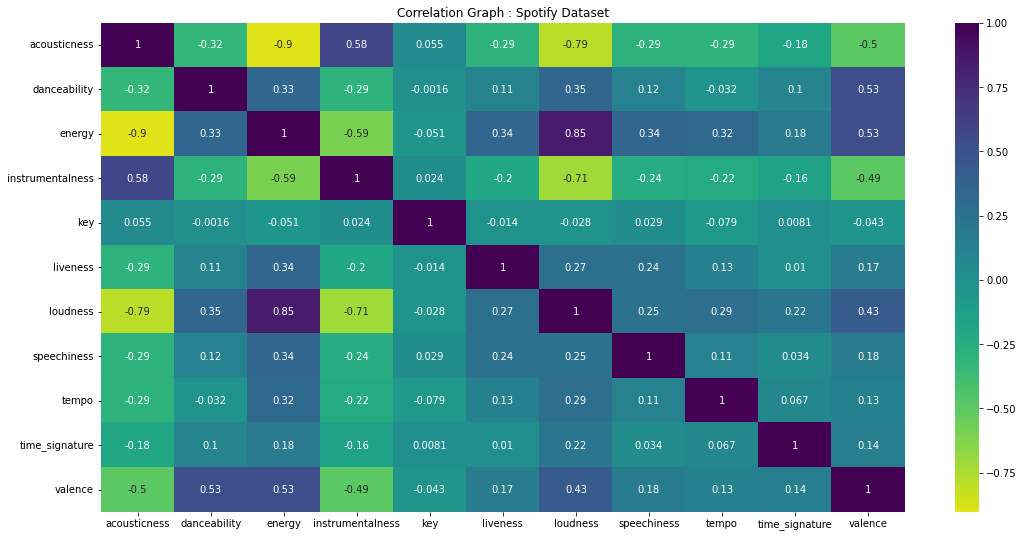

In [ ]:
plt.figure(figsize=(18,9))
plt.title("Correlation Graph : Spotify Dataset")
sns.heatmap(supervised_dataset.corr(),annot=True,center=0, cmap='viridis_r')

### ***Naive Bayes***

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)


0.8333333333333334
              precision    recall  f1-score   support

        Calm       0.97      0.92      0.94        36
   Energetic       0.88      0.78      0.83        37
       Happy       0.65      0.74      0.69        23
         Sad       0.80      0.86      0.83        42

    accuracy                           0.83       138
   macro avg       0.83      0.82      0.82       138
weighted avg       0.84      0.83      0.84       138



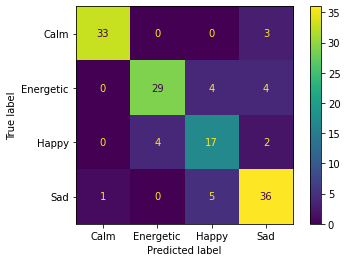

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

## **Generating the new dataset**
The best performing model is **(XGBoost)** utilised to produce new training samples by taking the vast Spotify dataset as input and effectively estimating their moods. This newly produced training data is utilised to train a new model, which is then used to the mood prediction process.

In [ ]:
clf=XGBClassifier()
X_test=dataset.values
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

In [ ]:
Y_pred.shape
clf.fit(X_test,Y_pred)

XGBClassifier(objective='multi:softprob')

In [ ]:
!pip install spotipy > /dev/null

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(client_id="your_client_Id",client_secret="your_client_secret")
sp = spotipy.Spotify(auth_manager=auth_manager)

In [ ]:
def find_moods(track):
  audio=sp.audio_features(tracks=[track])
  display(pd.DataFrame(audio[0],index=[0]))
  if not audio[0]:
    print("Please enter valid URL and try again")
    return
  print('Song Name: \t',sp.track(track)['name'])
  col=list(dataset.columns)
  test = []
  for feature in col:
    test.append(audio[0][feature])
  test=np.array(test)
  test=test.reshape(1,-1)
  pred=clf.predict(test)
  return pred[0]

In [ ]:

while True:
  song=input("Enter the link of the song:    ")
  track = song.split("/")[-1].split("?")[0]
  print('Track: \t',track)
  print('\033[92m'+'Mood: \t\t',find_moods(track),'\033[0m')
  check=input("Do you want to continue? (Y/N):    ")
  print()
  if check == 'N' or check == 'n':
    break

Track: 	 3ZbNhwAktyOwdypVSQhyy3


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.791,0.882,7,-5.624,0,0.147,0.352,0.000549,0.0672,0.81,113.026,audio_features,3ZbNhwAktyOwdypVSQhyy3,spotify:track:3ZbNhwAktyOwdypVSQhyy3,https://api.spotify.com/v1/tracks/3ZbNhwAktyOw...,https://api.spotify.com/v1/audio-analysis/3ZbN...,336973,4


Song Name: 	 Andangakka
Mood: 		 Happy 

Track: 	 6enTKMh4xcgKGOtQrJxBAY


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.625,0.596,4,-8.008,0,0.0679,0.793,0,0.12,0.964,141.272,audio_features,6enTKMh4xcgKGOtQrJxBAY,spotify:track:6enTKMh4xcgKGOtQrJxBAY,https://api.spotify.com/v1/tracks/6enTKMh4xcgK...,https://api.spotify.com/v1/audio-analysis/6enT...,309865,3


Song Name: 	 Harivarasanam
Mood: 		 Happy 
